In [131]:
import numpy as np
import pandas as pd
import seaborn as sns

In [132]:
import sklearn
import matplotlib.pyplot as plt

In [133]:
data=pd.read_csv('matches.csv')

In [134]:
data.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [136]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [137]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [138]:
data=data.iloc[:,:-1]
data.dropna(inplace=True)

In [139]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [140]:
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [141]:
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Captials')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Captials')

In [142]:
data['team1']=data['team1'].str.replace('Rising Pune Supergiants','Lucknow Super Giants')
data['team2']=data['team2'].str.replace('Rising Pune Supergiants','Lucknow Super Giants')
data['team1']=data['team1'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')
data['team2']=data['team2'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')
data['team1']=data['team1'].str.replace('Pune Warriors','Lucknow Super Giants')
data['team2']=data['team2'].str.replace('Pune Warriors','Lucknow Super Giants')



In [143]:
data['team1']=data['team1'].str.replace('Gujarat Lions','Gujarat Titans')
data['team2']=data['team2'].str.replace('Gujarat Lions','Gujarat Titans')


In [144]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
       'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Captials', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Delhi Capitals'], dtype=object)

In [145]:
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

Text(0.5, 1.0, 'Number of IPL matches won')

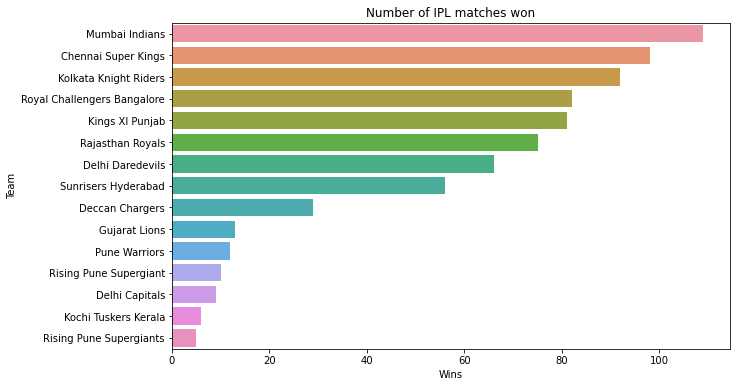

In [146]:
plt.figure(figsize =(10,6))
sns.countplot(y='winner',data=data,order=data['winner'].value_counts().index)
plt.xlabel("Wins")
plt.ylabel("Team")
plt.title("Number of IPL matches won")

Text(0.5, 1.0, 'Total Number of Matches')

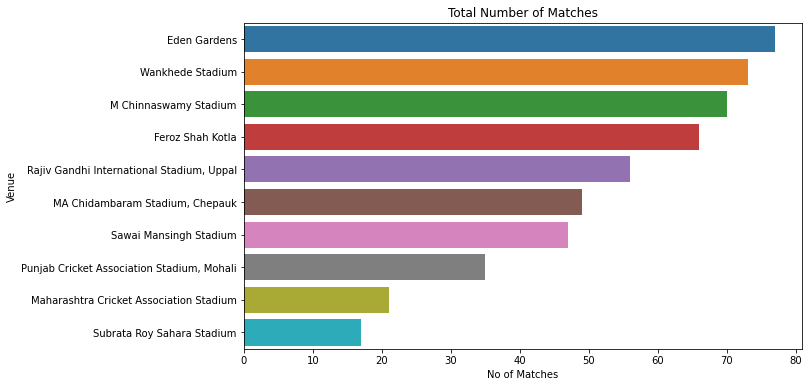

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(y='venue',data=data,order=data['venue'].value_counts().iloc[:10].index)
plt.xlabel("No of Matches")
plt.ylabel("Venue")
plt.title("Total Number of Matches")

Text(0.5, 1.0, 'Toss Decision')

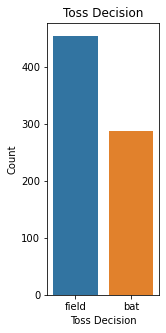

In [148]:
plt.figure(figsize=(2,5))
sns.countplot(x="toss_decision",data=data)
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision")

In [149]:
x=['city','toss_decision','result','dl_applied']
for i in x:
    print(data[i].unique())
    print(data[i].value_counts())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kim

In [150]:
data.drop(['id','Season','city','date','player_of_match','umpire1','venue','umpire2'],axis=1,inplace=True)

In [151]:
data.head(2)

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Lucknow Super Giants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7


In [152]:
X=data.drop(['winner'],axis=1)

In [153]:
y=data['winner']

In [154]:
X=pd.get_dummies(X,['team1','team2','toss_winner','toss_decision','result'],drop_first=True)

In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [157]:
from sklearn.ensemble import RandomForestClassifier as rf
model=rf(n_estimators=200,min_samples_split=3,max_features="auto")

In [158]:
model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [159]:
y_pred=model.predict(x_test)

In [160]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)

In [161]:
(ac)*100

87.91946308724832

<function matplotlib.pyplot.show(close=None, block=None)>

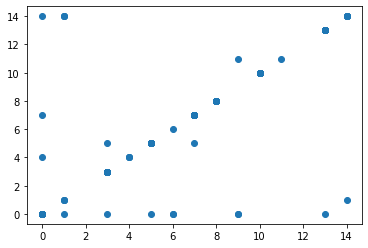

In [162]:
plt.scatter(y_test,y_pred)
plt.show